In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

result1 = pd.read_csv('country_vaccinations.csv', parse_dates = ['date'])
result2 = pd.read_csv('country_vaccinations_by_manufacturer.csv', parse_dates = ['date'])

result1

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [32]:
res = result1.loc[result1['people_fully_vaccinated_per_hundred'] < 20, ['country', 'date', 'people_fully_vaccinated_per_hundred']]
#res.groupby('country').min().sort_values(by = 'date')
res1 = res.groupby('country')[['date', 'people_fully_vaccinated_per_hundred']].max()
res1.loc[res1['people_fully_vaccinated_per_hundred'] < 20,].sort_values(by = 'people_fully_vaccinated_per_hundred', ascending = False)

,date,people_fully_vaccinated_per_hundred
country,,
Moldova,2021-10-07,19.99
Jamaica,2022-01-15,19.98
Ukraine,2021-11-13,19.98
Zimbabwe,2021-12-15,19.97
Belize,2021-09-09,19.97
...,...,...
Chad,2022-03-18,0.91
Kuwait,2021-04-18,0.88
Democratic Republic of Congo,2022-03-24,0.56


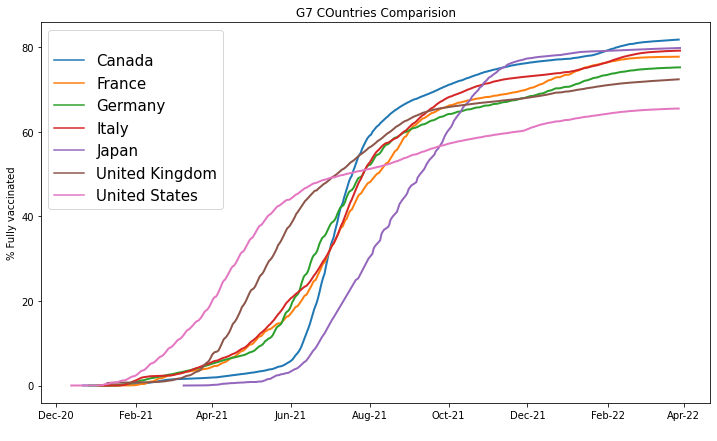

In [31]:
G7_res = result1.loc[result1['country'].isin(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United States', 'United Kingdom']), ['country', 'date', 'people_fully_vaccinated_per_hundred']]
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
fig, axes = plt.subplots(figsize = (12, 7))
sns.lineplot(x = 'date', y = 'people_fully_vaccinated_per_hundred', hue = 'country', data = G7_res, ax = axes, linewidth = 2)
axes.xaxis.set_major_formatter(DateFormatter("%b-%y"))
axes.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
axes.set_xlabel(" "); axes.set_ylabel("% Fully vaccinated")
axes.set_title("G7 COuntries Comparision")
axes.legend(title = " ", prop = {'size' : 15})

In [56]:

countries = ['Argentina', 'Spain', 'Japan', 'United States', 'France']
Res = result2.groupby(['location', 'vaccine'])[['date', 'total_vaccinations']]
Res_max = Res.max().reset_index()
Res_max.loc[Res_max['location'].isin(countries)].sort_values(by = ['location', 'total_vaccinations'], ascending = [True, False])

,location,vaccine,date,total_vaccinations
4,Argentina,Sinopharm/Beijing,2022-03-29,28322602
2,Argentina,Oxford/AstraZeneca,2022-03-29,25977231
5,Argentina,Sputnik V,2022-03-29,20405678
3,Argentina,Pfizer/BioNTech,2022-03-29,14681054
1,Argentina,Moderna,2022-03-29,6507561
0,Argentina,CanSino,2022-03-29,610540
68,France,Pfizer/BioNTech,2022-03-28,109187212
66,France,Moderna,2022-03-28,23535156
67,France,Oxford/AstraZeneca,2022-03-28,7857861
65,France,Johnson&Johnson,2022-03-28,1085968


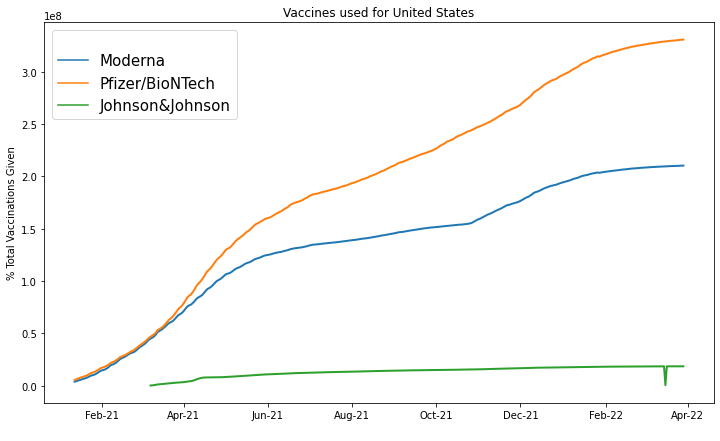

In [73]:
_res = result2.loc[result2['location'] == "United States"]
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
fig, axes = plt.subplots(figsize = (12, 7))
sns.lineplot(x = 'date', y = 'total_vaccinations', hue = 'vaccine', data = _res, ax = axes, linewidth = 2)
axes.xaxis.set_major_formatter(DateFormatter("%b-%y"))
axes.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
axes.set_xlabel(" "); axes.set_ylabel("% Total Vaccinations Given")
axes.set_title("Vaccines used for United States")
axes.legend(title = " ", prop = {'size' : 15})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


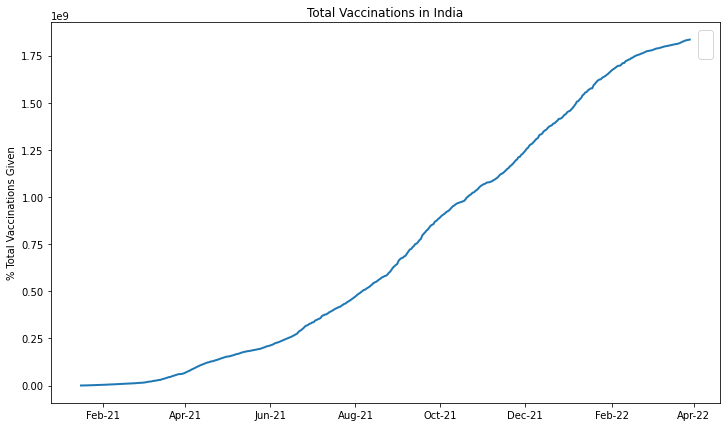

In [85]:
IND_data = result1[result1['iso_code'] == "IND"].copy()
IND_data.drop(IND_data.index[IND_data['total_vaccinations'] == 0], inplace = True)
fig, axes = plt.subplots(figsize = (12, 7))
sns.lineplot(x = 'date', y = 'total_vaccinations', data = IND_data, ax = axes, linewidth = 2)
axes.xaxis.set_major_formatter(DateFormatter("%b-%y"))
axes.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
axes.set_xlabel(" "); axes.set_ylabel("% Total Vaccinations Given")
axes.set_title("Total Vaccinations in India")
axes.legend(title = " ", prop = {'size' : 15})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


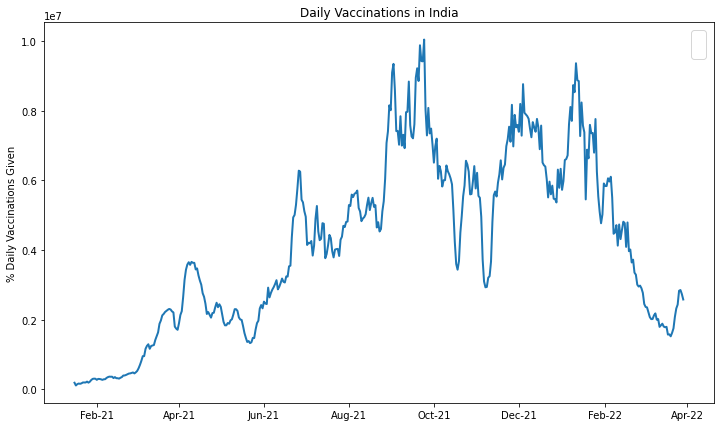

In [86]:
IND_data = result1[result1['iso_code'] == "IND"].copy()
IND_data.drop(IND_data.index[IND_data['total_vaccinations'] == 0], inplace = True)
fig, axes = plt.subplots(figsize = (12, 7))
sns.lineplot(x = 'date', y = 'daily_vaccinations', data = IND_data, ax = axes, linewidth = 2)
axes.xaxis.set_major_formatter(DateFormatter("%b-%y"))
axes.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
axes.set_xlabel(" "); axes.set_ylabel("% Daily Vaccinations Given")
axes.set_title("Daily Vaccinations in India")
axes.legend(title = " ", prop = {'size' : 15})